In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data = tf.imread(r"E:\data\my data\February 2024 Arrhythmic\Fish 1 0.1gl\2024-02-22 13.37.23 vid\Allied Vision Technologies GS650 0001f61c\1280184.tif")

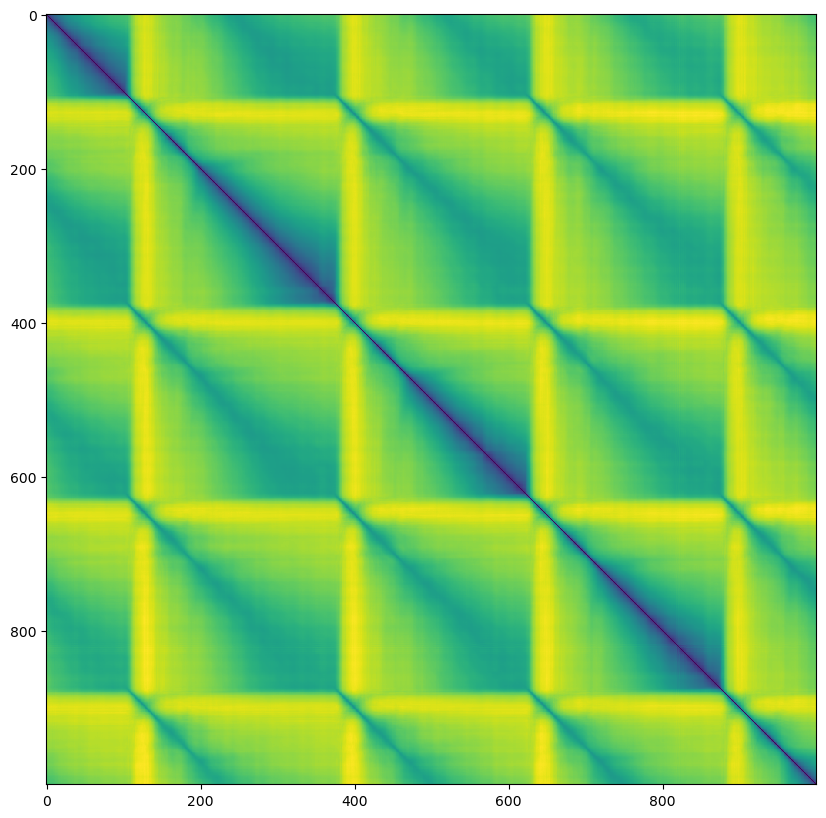

In [3]:
sads = []
for i in range(data.shape[0]):
    sads.append(jps.sad_with_references(data[i], data))

plt.figure(figsize = (10,10))
plt.imshow(sads, interpolation = "none")
plt.show()

In [4]:
source_folder = r"E:\data\my data\February 2024 Arrhythmic\Fish 1 0.1gl\2024-02-22 13.37.23 vid"
data_src = source_folder + r"\cropped.tif"
frame_rate = 120

In [5]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.skip_frames = 1000
oog.run()

Setting source to E:\data\my data\February 2024 Arrhythmic\Fish 1 0.1gl\2024-02-22 13.37.23 vid\cropped.tif
Getting reference sequence
Reference period: 6.288393862612622; Reference indices: [188, 199]
Getting SADs
Getting phases


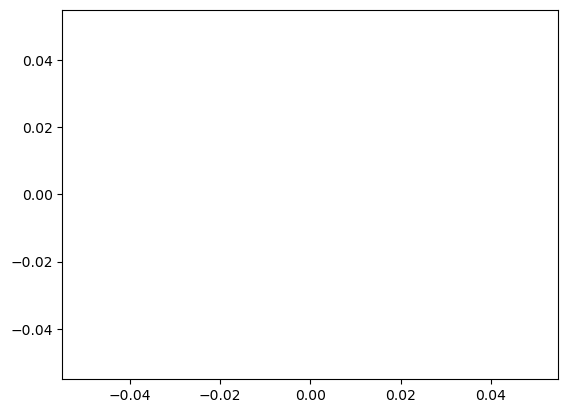

In [6]:
plt.plot(oog.drifts)

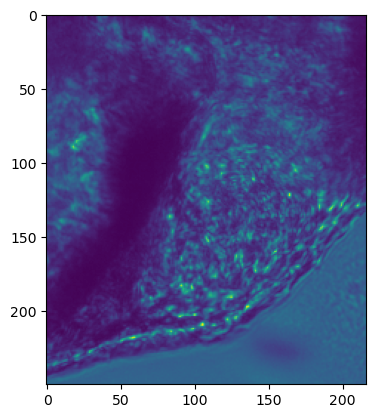

In [7]:
plt.imshow(oog.sequence_manager.reference_sequence[0])
plt.show()

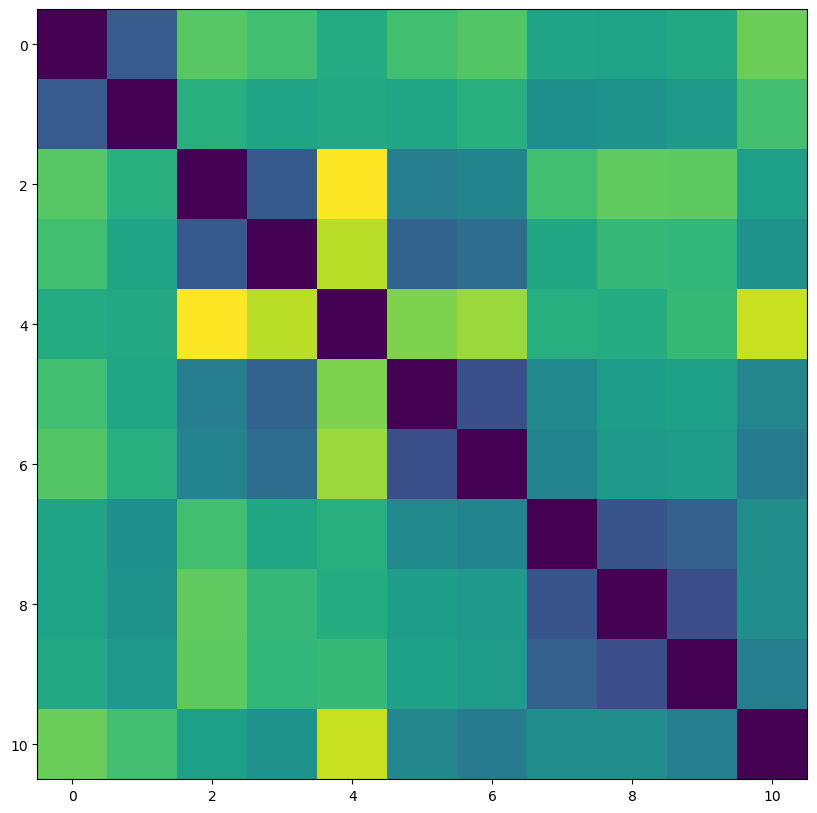

In [8]:
sads = []
for i in range(oog.sequence_manager.reference_sequence.shape[0]):
    sads.append(jps.sad_with_references(oog.sequence_manager.reference_sequence[i], oog.sequence_manager.reference_sequence))

plt.figure(figsize = (10,10))
plt.imshow(sads, interpolation = "none")
plt.show()

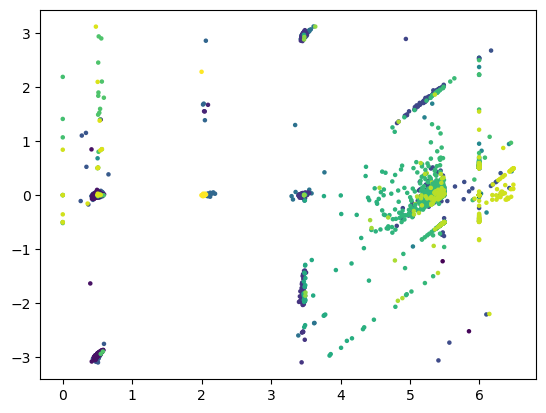

In [9]:
plt.scatter(oog.phases[1::], oog.delta_phases, s = 5, c = oog.unwrapped_phases[1::])

In [10]:
print(np.mean(oog.delta_phases))

0.0012214061888421448
